<a href="https://colab.research.google.com/github/grupo21dex/deliverable-2/blob/main/deliverable2_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas utilizadas:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 
import geopy 

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


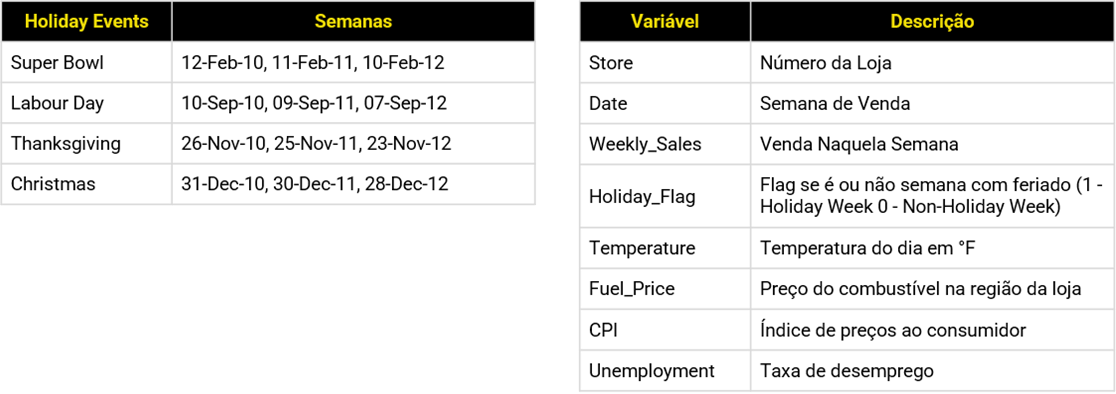

Criando a coluna ***Holiday_type*** que mostra se é dia normal ou feriado

In [4]:
print(df['Date'].dtypes)

object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Verificando se só tem valores 0 e 1 na coluna ***Holiday_Flag***

In [6]:
pd.DataFrame(df['Holiday_Flag'].value_counts())

,Holiday_Flag
0,5985
1,450


In [7]:
len(df)

6435

Criando a lista ***Holiday_Type***

In [8]:
#Super_boul
#Labour_day
#Thanksgiving
#Christmans

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
  if y == 0:
    Holiday_Type.append('Regular_day')
  elif y ==1:
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Holiday_Type.append('Super_Boul')
    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Holiday_Type.append('Labour_Day')
    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Holiday_Type.append('Thanksgiving')
    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Holiday_Type.append('Christmans')




Adicionando a coluna ***Holiday_type*** que diz se é um dia normal ou qual feriado

In [9]:
df['Holiday_type'] = Holiday_Type

criando colunas especificas de cada feriado para ficar mais facil buscar os dados do feriado

Arrumar o codigo para ficar menor e mais eficiente

FIzemos um retrabalho aqui!!!!!!

In [20]:
Super_boul = list()
Labour_day = list()
Thanksgiving = list()
Christmans = list()

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Super_boul.append(1)
    else:
      Super_boul.append(0)
    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Labour_day.append(1)
    else:
      Labour_day.append(0)
    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Thanksgiving.append(1)
    else:
      Thanksgiving.append(0)
    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Christmans.append(1)
    else:
      Christmans.append(0)

In [21]:
'''Super_boul = list()
Labour_day = list()
Thanksgiving = list()
Christmans = list()

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Super_boul.append(1)
    elif df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Labour_day.append(1)
    elif df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Thanksgiving.append(1)
    elif df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Christmans.append(1)
    else:
      Super_boul.append(0)
      Labour_day.append(0)
      Thanksgiving.append(0)
      Christmans.append(0)'''

"Super_boul = list()\nLabour_day = list()\nThanksgiving = list()\nChristmans = list()\n\nHoliday_Type = list()\t\nfor x,y in enumerate(df['Holiday_Flag']):\n    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':\n      Super_boul.append(1)\n    elif df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':\n      Labour_day.append(1)\n    elif df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':\n      Thanksgiving.append(1)\n    elif df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':\n      Christmans.append(1)\n    else:\n      Super_boul.append(0)\n      Labour_day.append(0)\n      Thanksgiving.append(0)\n      Christmans.append(0)"

In [22]:
len(Super_boul)

6435

In [23]:
len(Super_boul),len(Labour_day),len(Thanksgiving),len(Christmans)

(6435, 6435, 6435, 6435)

In [24]:
df['Super_boul'] = Super_boul, Labour_day,Thanksgiving,Christmans
df['Labour_day'] = Labour_day
df['Thanksgiving'] = Thanksgiving
df['Christmans'] = Christmans

ValueError: ignored

In [ ]:
df['Super_boul'].value_counts(),df['Labour_day'].value_counts(),df['Thanksgiving'].value_counts(),df['Christmans'].value_counts()

In [ ]:
df[df['Super_boul']==1]

In [ ]:
len(Thanksgiving)

In [ ]:
df.head(10)

Fazendo a correlação

pqp, sfd, tmnc outro dataframe sem correlaçao ..|..


In [ ]:
sns.pairplot(df)
df.corr()

In [ ]:
df.corr()['Weekly_Sales']

Colocando em ordem decrescente usando a coluna ***Weekly_Sales***

In [11]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Regular_day
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Regular_day
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Regular_day
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Regular_day
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Regular_day
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Regular_day
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Regular_day
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Regular_day


In [14]:
df_Thanksgiving = df[df['Holiday_type'] == 'Thanksgiving']

In [15]:
df_Thanksgiving.sort_values(by=['Weekly_Sales'],ascending=False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143,Thanksgiving
1381,10,25-11-2011,2950198.64,1,60.68,3.760,129.836400,7.874,Thanksgiving
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003,Thanksgiving
1901,14,26-11-2010,2921709.71,1,46.15,3.039,182.783277,8.724,Thanksgiving
2811,20,25-11-2011,2906233.25,1,46.38,3.492,211.412076,7.082,Thanksgiving
...,...,...,...,...,...,...,...,...,...
5099,36,25-11-2011,332811.55,1,66.41,3.181,217.181253,7.716,Thanksgiving
6243,44,25-11-2011,309129.01,1,38.89,3.445,129.836400,6.078,Thanksgiving
6191,44,26-11-2010,307646.50,1,28.22,2.830,126.669267,7.610,Thanksgiving
4670,33,25-11-2011,255996.47,1,62.35,3.760,129.836400,8.010,Thanksgiving


In [ ]:
df.sort_values(by=['Weekly_Sales'],ascending=False).head(30)

Grafico de barras com as comparações de vendas em feriados com dias normais

In [ ]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

Grafico das vendas por feriados

In [ ]:
df.groupby('Store')['Weekly_Sales'].sum()

Verificando qual loja teve mais vendas, fazer somatorio das vendas de cada loja

fazer soma separadas dos feriados e dos dias comuns

mostrar em float

In [16]:
df_lojas = df.groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})
df_lojas

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
1,2.224028e+08,68.306783,3.219699,215.996892,7.610420
2,2.753824e+08,68.216364,3.219699,215.646311,7.623846
3,5.758674e+07,71.434196,3.219699,219.391531,7.176986
4,2.995440e+08,62.253357,3.216972,128.679669,5.964692
5,4.547569e+07,69.410140,3.219699,216.565581,6.295406
6,2.237561e+08,69.700000,3.219699,217.553197,6.606902
7,8.159828e+07,39.720280,3.241559,193.664243,8.585734
8,1.299512e+08,62.513986,3.219699,219.439026,6.091846
9,7.778922e+07,67.775175,3.219699,219.626689,6.099881


Verificando as lojas que possuem mais vendas

In [ ]:
display(df_lojas.sort_values(by= ['Weekly_Sales'], ascending = False))

Verificando as lojas que vendem menos

In [ ]:
display(df_lojas.sort_values(by= ['Weekly_Sales'], ascending =True))

Fazer relatório em power point, com graficos insights e decisões, com apresentação do projeto???

O Índice de Preços ao Consumidor (IPC) mede a variação de preços de um conjunto fixo de bens e serviços componentes de despesas habituais de famílias com nível de renda situado entre 1 e 33 salários mínimos mensais.

Verifica-se que os feriados nao exercem mta influencia para as vendas, obs verificar proximidades com o feriado(ex: as maiores vendas foram nos dias 23 e 24, considerou natal dias 28,30 e 31, não podemos só olhar o dia dos feriados precisaremos ver a proximidade)

"essas remarcações precedem feriados importantes, os quatro maiores de todos, que são (os 4 marcados) as semanas que incluem esses feriados tem um peso maior"

Verificar se as lojas proximas aos acontecimentos especificos dos feriados exercem alguma influencia na venda(ex no feriado do ***Super_Boul*** as lojas proximas ao local ocorre mais influencia desse feriado): Precisa conseguir os endereços das lojas e dos acontecimentos do feriado



Pq estão pedindo tanto destaque com feriados se precisamos considerar as lojas que mais vendem o ano inteiro já que o aumento da loja é uma mudança permanente

fazer somatorio de todas as ***Weekly_Sales*** por loja para identificar as que tiveram maior volume de vendas

Regiao x desemprego x populacao da regiao*

quantidade de venda pelo tamanho da loja: pesquisar se é possivel conseguir esse dado:

---

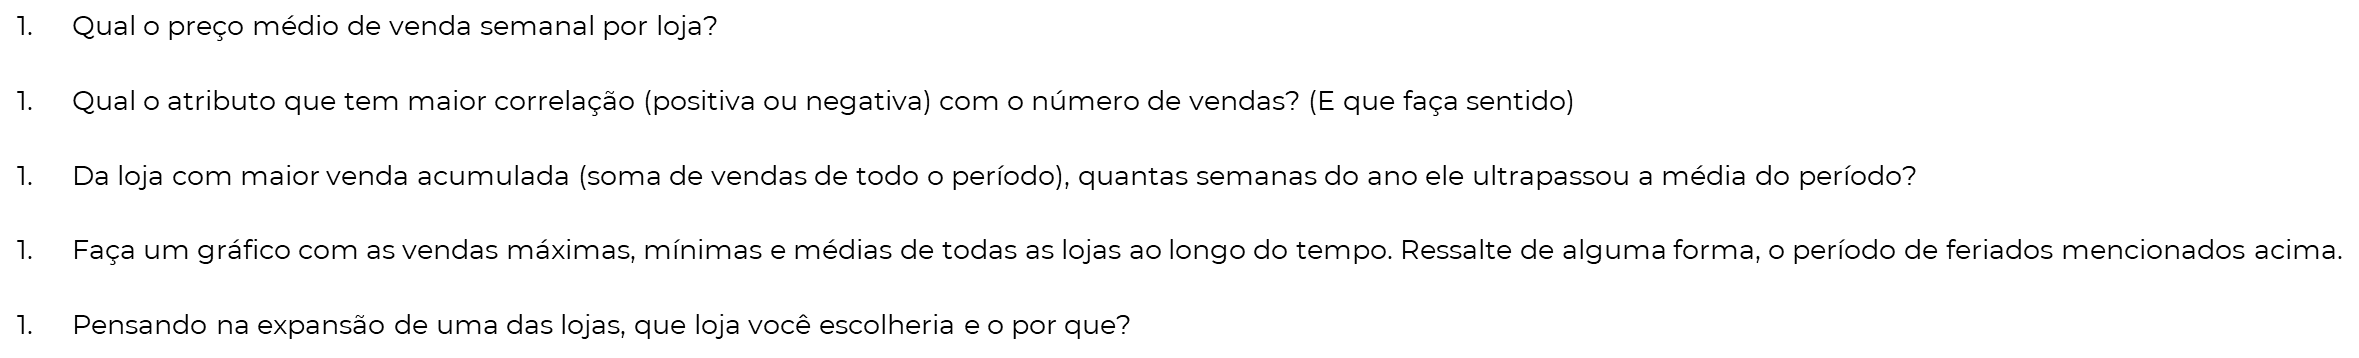